# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.611257e+01     1.316763e+01
 * time: 0.0016009807586669922
     1     3.530666e+01     9.833891e+00
 * time: 0.0063478946685791016
     2     2.767705e+01     5.173992e+00
 * time: 0.013144969940185547
     3     2.204305e+01     2.874878e+00
 * time: 0.019006967544555664
     4     2.016079e+01     2.151487e+00
 * time: 0.024281978607177734
     5     1.940346e+01     2.443826e+00
 * time: 0.02859187126159668
     6     1.884740e+01     1.905622e+00
 * time: 0.033032894134521484
     7     1.831838e+01     2.584747e+00
 * time: 0.037439823150634766
     8     1.796028e+01     1.746033e+00
 * time: 0.04170989990234375
     9     1.758579e+01     1.069873e+00
 * time: 0.045964956283569336
    10     1.732053e+01     8.370002e-01
 * time: 0.05022382736206055
    11     1.719566e+01     6.816114e-01
 * time: 0.054602861404418945
    12     1.711625e+01     4.671658e-01
 * time: 0.059056997299194336
    13     1.708915e+01     7.557298e

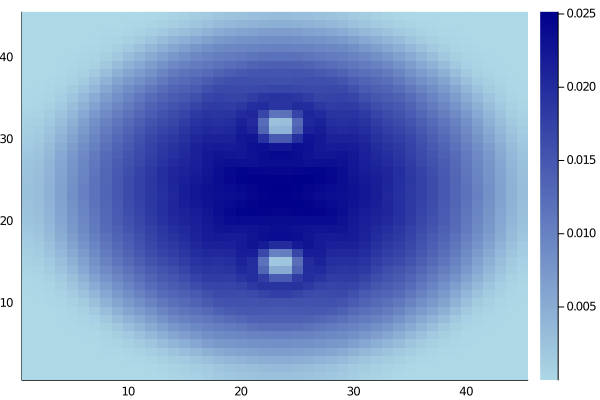

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)